<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#e96e3f;overflow:hidden;font-weight:800">Exercise And Fitness</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exercise-and-fitness-metrics-dataset/exercise_dataset.csv


<h2 style="color:#e96e3f;"> Shall we exercise? So let's go to the gym! </h2>

## <b><div style='padding:15px;background-color:#e96e3f;color:white;border-radius:2px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

The "Exercise and Fitness Metrics Dataset: Independent Variables and Weight Related Measures" is a comprehensive dataset that captures various factors related to exercise, fitness, and weight management. The dataset includes a range of independent variables along with measurements of dream weight and actual weight.

The exercise variable represents the type of exercise performed, while calories burned denotes the estimated number of calories burnt during the exercise session. Dream weight signifies the desired weight, and actual weight captures the measured weight with some natural variation.

Additional independent variables provide insights into the individuals performing the exercises. Age represents the age of the individuals, and gender indicates their gender (Male or Female). Duration records the length of each exercise session, and heart rate represents the average heart rate during the session. BMI, a commonly used health indicator, offers information about body composition. Weather conditions during exercise sessions are recorded, and exercise intensity provides a rating of the intensity level.

BMI Weight Group

**Below 18.5 Underweight**

**18.5-24.9 Normal weight**

**25.0-29.9 Overweight**

**30.0-34.9 Obesity class I**

**35.0-39.9 Obesity class II**

**Above 40 Obesity class III**

This dataset is valuable for analyzing relationships between exercise variables, calorie expenditure, weight-related measures, and other factors such as age, gender, duration, heart rate, BMI, weather conditions, and exercise intensity. It can be used for various purposes, including research in exercise science, fitness program development, weight management analysis, and correlation studies between exercise and health-related factors.

**In this study, I am contemplating only an analysis of the groups (BMI Weight Group) in relation to all the other variables presented in the dataset.**

## <b><div style='padding:15px;background-color:#e9623f;color:white;border-radius:2px;font-size:110%;text-align: center'>2  |  Libraries</div></b>

<h2 style="color:#e96e3f;"> First let's invite some friends to work out with us. </h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#e96e3f;color:white;border-radius:2px;font-size:110%;text-align: center'>3  |  Dataset</div></b>

<h2 style="color:#e96e3f;"> Now let's look at the gym. </h2>

In [3]:
df = pd.read_csv('/kaggle/input/exercise-and-fitness-metrics-dataset/exercise_dataset.csv')

In [4]:
df.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


## <b><div style='padding:15px;background-color:#e96e36;color:white;border-radius:2px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

<h2 style="color:#e96e3f;"> Before we start exercising, let's organize and clean the gym. </h2>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB


In [6]:
# Check NaN values
display(df.isnull().sum())

ID                    0
Exercise              0
Calories Burn         0
Dream Weight          0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Weather Conditions    0
Exercise Intensity    0
dtype: int64

In [7]:
df.describe()

,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,1932.500000,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,1115.585048,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,1.000000,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,966.750000,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,1932.500000,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,2898.250000,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,3864.000000,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


<h2 style="color:#e96e3f;"> Now let's divide the friends into groups. </h2>

In [8]:
# Check minimum and maximum value of the BMI column

print(df['BMI'].min())
print(df['BMI'].max())


18.50001378
34.99663922


In [9]:
# Create "Group" column based on BMI groups

df['Group'] = pd.cut(x=df['BMI'], bins=[18, 24.9, 29.9, 34.9, 40]\
                           , labels=['Normal_weight', 'Overweight',\
                                     'Obesity_Class_1', 'Obesity_Class_2'])

In [10]:
df.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity,Group
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5,Overweight
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5,Normal_weight
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4,Overweight
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10,Obesity_Class_1
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3,Normal_weight


## <b><div style='padding:15px;background-color:#e96e3f;color:white;border-radius:2px;font-size:110%;text-align: center'>5  |  Group</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#e96e3f'> Group</span></b>  

<h2 style="color:#e96e3f;"> This time we will evaluate the created groups. </h2>

In [11]:
df['Group'].value_counts()

Normal_weight      1491
Obesity_Class_1    1176
Overweight         1174
Obesity_Class_2      23
Name: Group, dtype: int64

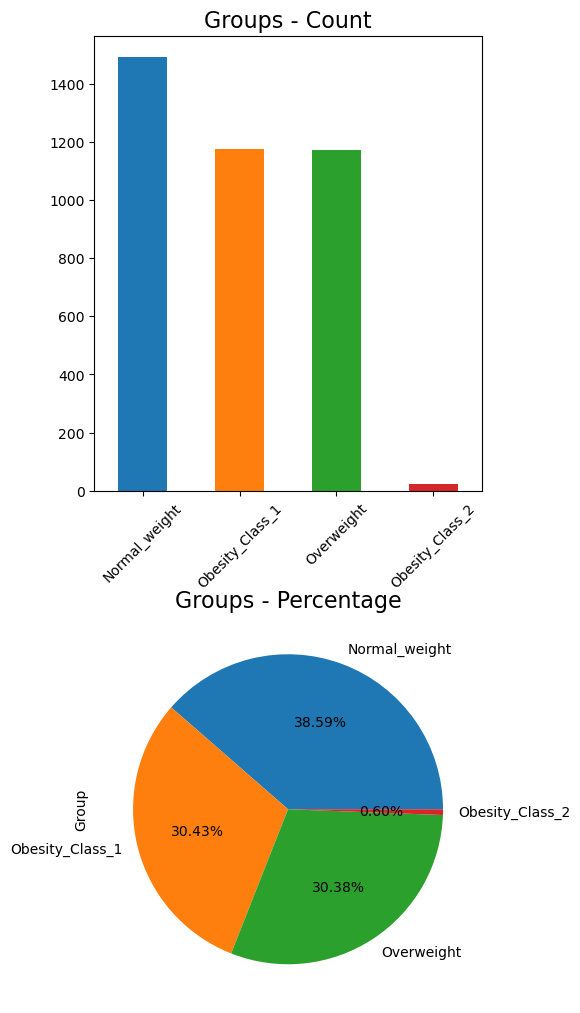

In [12]:
# Group
plt.figure(figsize=(5,13))
plt.subplot(2,1,1)
df['Group'].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
plt.title("Groups - Count", fontsize=16)
plt.xticks(rotation=45)

plt.subplot(2,1,2)
df['Group'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title("Groups - Percentage", fontsize=16)
plt.show()


<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> 
We can see that group 'Obesity_Class_2' presents a very small amount of records, therefore, the results of this group may be compromised.</div>

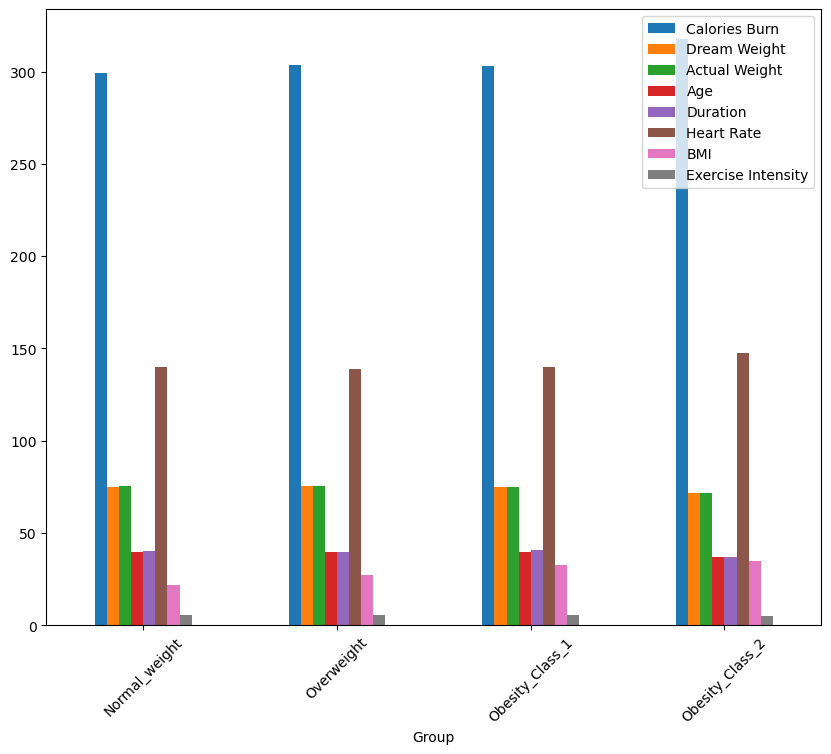

In [13]:
df_gro=df[['Calories Burn', 'Dream Weight', 'Actual Weight', 'Age', 'Duration', 'Heart Rate', 'BMI', 'Exercise Intensity', 'Group']].groupby('Group').mean()
df_gro=df_gro.reset_index()
df_gro.plot(x="Group", y=['Calories Burn', 'Dream Weight', 'Actual Weight', 'Age', 'Duration', 'Heart Rate', 'BMI', 'Exercise Intensity'], kind="bar", figsize=(10, 8))
plt.xticks(rotation=45)
plt.show()

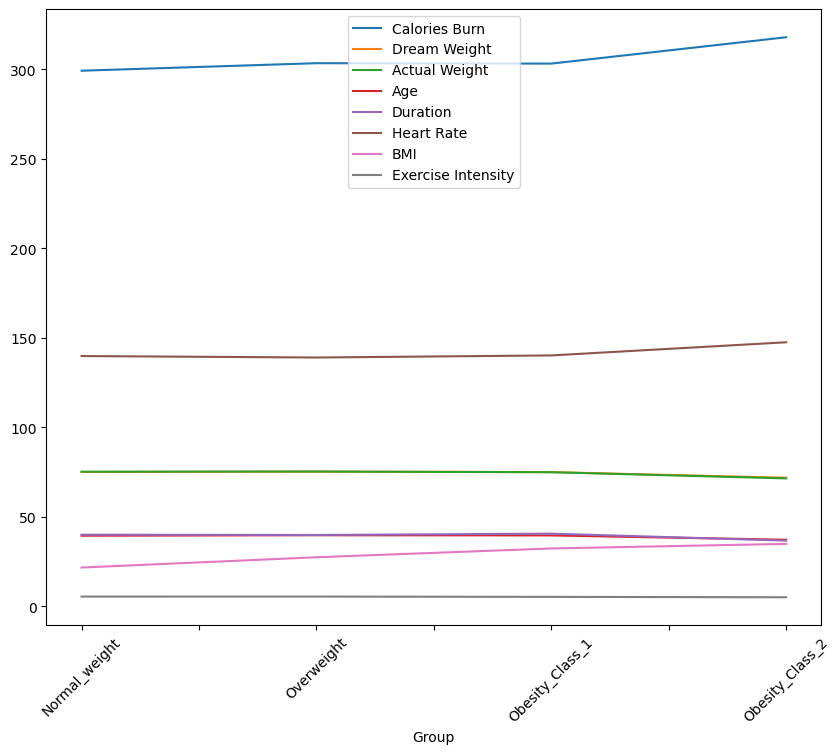

In [14]:
df_cont_gro=df[['Calories Burn', 'Dream Weight', 'Actual Weight', 'Age', 'Duration', 'Heart Rate', 'BMI', 'Exercise Intensity', 'Group']].groupby('Group').mean()
df_cont_gro=df_cont_gro.reset_index()
df_cont_gro.plot(x="Group", y=['Calories Burn', 'Dream Weight', 'Actual Weight', 'Age', 'Duration', 'Heart Rate', 'BMI', 'Exercise Intensity'], kind="line", figsize=(10, 8))
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> 
The 2 graphs above show the variation between groups and other variables. However, as the values are close, it is not possible to make a correct assessment. So let's look at each variable individually.</div>


In [15]:
# Create function for graph of Group X Other Variables.


def compare_groups(columnName):
    
    df_cont_gro=df[[columnName, 'Group']].groupby('Group').mean()
    df_cont_gro=df_cont_gro.reset_index()

    fig = px.bar(df_cont_gro, y='Group', x= columnName, text_auto='.5s',
             title= columnName + " per Group - Mean", color='Group')
    fig.show()


### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#e96e3f'> Dream Weight</span></b>  

<h2 style="color:#e96e3f;"> Well, what will be the dreamed weight of each group? </h2>

In [16]:
compare_groups('Dream Weight')

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> 
What we can see here is that group 'Obesity_Class_2', despite being the most obese group, is the group with the lowest 'Dream Weight'. It's probably the group with the lowest 'Actual Weight' as well. The other groups are very similar.</div>

### <b><span style='color:#DEB078'>5.3 |</span><span style='color:#e96e3f'> Atual Weight</span></b>  

<h2 style="color:#e96e3f;"> But what is the current weight of each group? </h2>

In [17]:
compare_groups('Actual Weight')

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> 
As we predicted, group Obesity_Class_2 has the lowest "Actual Weight'. The other groups are very similar.</div>

### <b><span style='color:#DEB078'>5.4 |</span><span style='color:#e96e3f'> Age</span></b>  

<h2 style="color:#e96e3f;"> And what is the average age of each group? </h2>

In [18]:
compare_groups('Age')

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> 
The group Obesity_Class_2 has the lowest "Age'. The other groups are very similar.</div>

### <b><span style='color:#DEB078'>5.5 |</span><span style='color:#e96e3f'> Duration</span></b>  

<h2 style="color:#e96e3f;"> So now I would like to know how long each group likes to exercise. </h2>

In [19]:
compare_groups('Duration')

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> 
Group Obesity_Class_1 has the longest duration exercises and group Obesity_Class_2 has the shortest duration.</div>

### <b><span style='color:#DEB078'>5.6 |</span><span style='color:#e96e3f'> Heart Rate</span></b>  

<h2 style="color:#e96e3f;"> And our heart, how is it? Shall we check the heartbeat? </h2>

In [20]:
compare_groups('Heart Rate')

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> 
The group Obesity_Class_2 has the highest "Heart Rate'. The other groups are very similar.</div>

### <b><span style='color:#DEB078'>5.7 |</span><span style='color:#e96e3f'> BMI</span></b>  

<h2 style="color:#e96e3f;"> And what would the 'BMI Weight Group' be? </h2>

In [21]:
compare_groups('BMI')

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> 
As expected, BMI increases along with obesity.</div>

### <b><span style='color:#DEB078'>5.8 |</span><span style='color:#e96e3f'> Exercise Intensity</span></b>  

<h2 style="color:#e96e3f;"> Now let's see the intensity that each group exercises. </h2>

In [22]:
compare_groups('Exercise Intensity')

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> 
Exercise intensity decreases in the 2 most obese groups.</div>

### <b><span style='color:#DEB078'>5.9 |</span><span style='color:#e96e3f'> Exercise</span></b> 

<h2 style="color:#e96e3f;"> Which exercises does each group prefer?</h2>

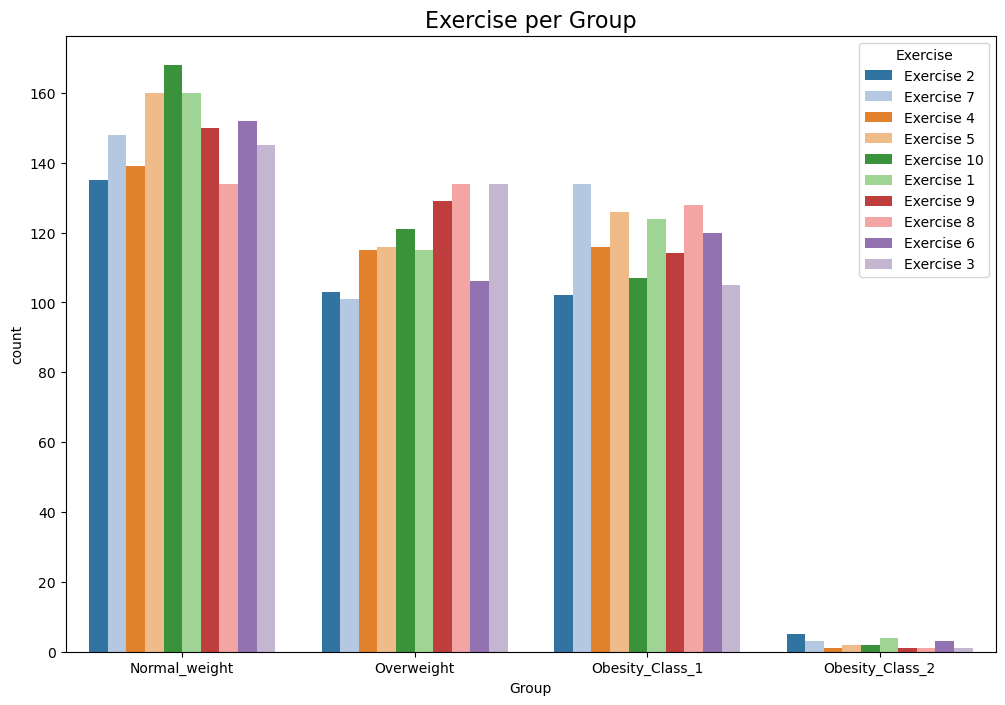

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Group'], hue=df['Exercise'], palette = 'tab20')
plt.title("Exercise per Group", fontsize=16)
plt.show()

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> 
Preferred exercises by group:
    
- Normal_weight = 10, 5, 1

- Overweight = 3, 8, 9

- Obesity_Class_1 = 7, 8, 5

- Obesity_Class_2 = 2, 1, 6</div>

### <b><span style='color:#DEB078'>5.10 |</span><span style='color:#e96e3f'> Gender</span></b>  

<h2 style="color:#e96e3f;"> Well, now let's see how the groups are composed by gender. </h2>

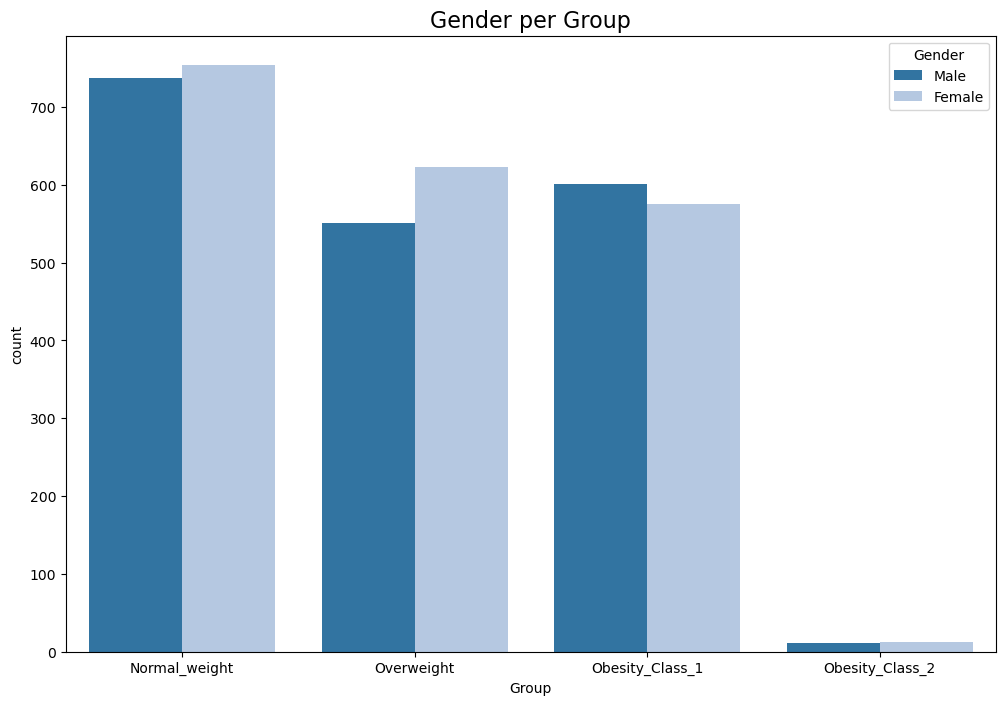

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Group'], hue=df['Gender'], palette = 'tab20')
plt.title("Gender per Group", fontsize=16)
plt.show()

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> 
There are more men in group Obesity_Class_1 and more women in groups Normal_weight and Overweight.</div>

### <b><span style='color:#DEB078'>5.11 |</span><span style='color:#e96e3f'> Weather Conditions</span></b>  

<h2 style="color:#e96e3f;"> And what would be the preferred weather condition for each group to exercise? </h2>

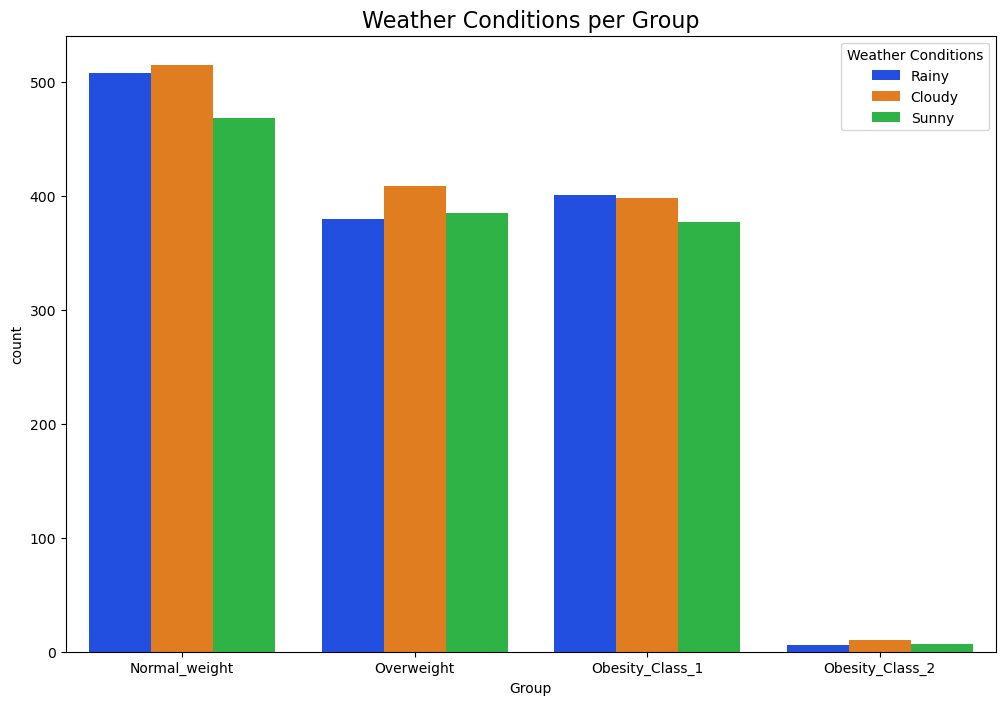

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['Group'], hue=df['Weather Conditions'], palette = 'bright')
plt.title("Weather Conditions per Group", fontsize=16)
plt.show()

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#e96e3f;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> 
Preferred Weather Conditions by group:
    
- Normal_weight = Cloudy

- Overweight = Cloudy

- Obesity_Class_1 = Rainy

- Obesity_Class_2 = Cloudy</div>

<h2 style="color:#e96e3f;"> Well, now it's your turn. What are your preferences for exercising?</h2>
    
 <h2 style="color:#e96e3f;">   Don't forget to exercise the body, because we've already exercised the mind by performing this kernel. </h2>

## <b><div style='padding:15px;background-color:#e96e3f;color:white;border-radius:2px;font-size:110%;text-align: center'>And if you like it, exercise your finger by clicking on the upvote. Thank you very much</div></b>